In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# importing data from csv file

In [3]:
data=pd.read_csv('quotes.csv')
df=pd.DataFrame(data)
df.head()

,author,quote,tags
0,Albert Einstein,The world as we have created it is a process o...,change
1,Albert Einstein,The world as we have created it is a process o...,deep-thoughts
2,Albert Einstein,The world as we have created it is a process o...,thinking
3,Albert Einstein,The world as we have created it is a process o...,world
4,J.K. Rowling,"It is our choices, Harry, that show what we tr...",abilities


# Basic statistics about the data

In [5]:
df.info

<bound method DataFrame.info of                  author                                              quote  \
0       Albert Einstein  The world as we have created it is a process o...   
1       Albert Einstein  The world as we have created it is a process o...   
2       Albert Einstein  The world as we have created it is a process o...   
3       Albert Einstein  The world as we have created it is a process o...   
4          J.K. Rowling  It is our choices, Harry, that show what we tr...   
..                  ...                                                ...   
230   Madeleine L'Engle  You have to write the book that wants to be wr...   
231          Mark Twain  Never tell the truth to people who are not wor...   
232           Dr. Seuss          A person's a person, no matter how small.   
233  George R.R. Martin  ... a mind needs books as a sword needs a whet...   
234  George R.R. Martin  ... a mind needs books as a sword needs a whet...   

              tags  
0         

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

author    0
quote     0
tags      3
dtype: int64

# cleaning the data

In [9]:
# filling missing values with 'non'

df['tags'].fillna('non')

0             change
1      deep-thoughts
2           thinking
3              world
4          abilities
           ...      
230          writing
231            truth
232    inspirational
233            books
234             mind
Name: tags, Length: 235, dtype: object

In [10]:
# removing hyphens present in tags column

import re
df['tags'] = df['tags'].replace(r'[^a-zA-Z0-9 ]', ' ', regex=True) 

# Data Visualization

In [12]:
#1

df['quote_len']=df['quote'].apply(len)

In [23]:
df.sort_values(by='quote_len',ascending=False).head()

,author,quote,tags,quote_len
30,Marilyn Monroe,"This life is what you make it. No matter what,...",friends,1082
35,Marilyn Monroe,"This life is what you make it. No matter what,...",sisters,1082
34,Marilyn Monroe,"This life is what you make it. No matter what,...",love,1082
33,Marilyn Monroe,"This life is what you make it. No matter what,...",life,1082
32,Marilyn Monroe,"This life is what you make it. No matter what,...",inspirational,1082


<Axes: xlabel='author'>

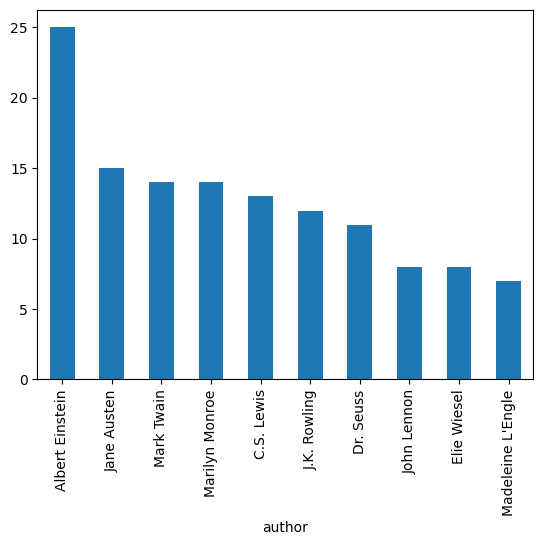

In [14]:
df.groupby('author')['quote'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: ylabel='tags'>

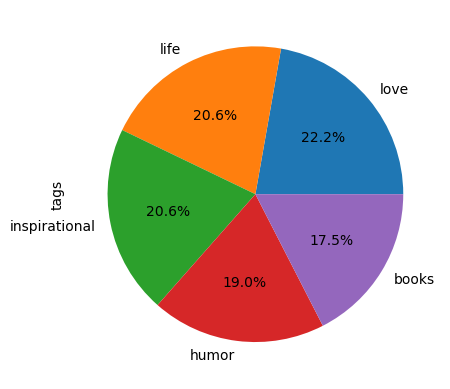

In [29]:
df.groupby('tags')['tags'].count().sort_values(ascending=False).head().plot(kind='pie',autopct='%1.1f%%')

In [19]:
!pip install stylecloud==0.5.2

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259504 sha256=f419dfe02deb5a515730316f63a47080dde2a4552c346a58b0377a14fb139772
  Stored in directory: c:\users\as\appdata\local\pip\cache\wheels\9e\8f\a1\92e42ee8ae0a18044d8c414c5c89516d762e661a5388e0f852
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114262 sha256=cd096c57300c275bacdeab4363edcb982de31b37fda920ce92d2ec62459b3e1d
  Stored in directory: c:\users\as\appdata\local\pip\cache\wheels\9e\5b\45\29f72e55d87a29426b04b3cfdf20325c079eb97ab74f59017d
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43956 sha256=4759092209db7c639b74d7b03cc8477be2f02c277fafcd21f86

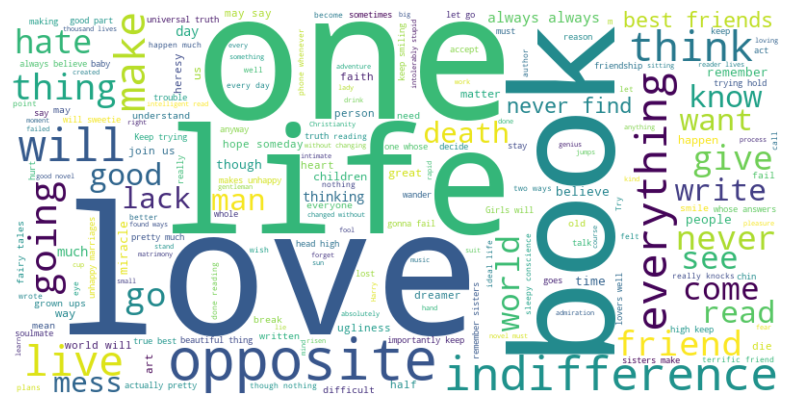

In [21]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all quotes into a single string
text = ' '.join(df['quote'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# *Insights from the data visualization
## 1. The most common tag used by the authors is 'LOVE' which is used 14 times .
## 2. The author with highest number of quotes is 'ELBERT EINSTEIN' who has quoted 25 times.
## 3. The longest quote is 'This life is what you make it. No matter what,...' by 'MARILYM MONROE'.
## 4. The longest quote has a length of  1082 characters.